<font size="+3"><strong> HOUSING PRICE PREDICTION</strong></font> 

This project is meant to build an algorithm to predict housing prices in Argentina.

Importing libraries

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

## Importing Data

In [260]:
df = pd.read_csv("datos_properati.csv")

Next we need to explore the data

In [262]:
df.shape
df.tail()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18974,2018-01-08,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.668741,-58.443146",-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,NaN,3.0,NaN,https://www.properati.com.ar/1jcpm_venta_depar...,VILLA SOLDATI,8.0
18975,2018-01-23,sell,house,|Argentina|Capital Federal|Villa Soldati|,"-34.66417,-58.443317",-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,NaN,3.0,NaN,https://www.properati.com.ar/1k1hs_venta_casa_...,VILLA SOLDATI,8.0
18976,2018-01-24,sell,store,|Argentina|Capital Federal|Villa Soldati|,"-34.6618136,-58.426504",-34.661814,-58.426504,3300000.00,NaN,4162.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1k1mv_venta_local...,VILLA SOLDATI,8.0
18977,2018-01-27,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.665005,-58.443041",-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,NaN,3.0,NaN,https://www.properati.com.ar/1k5v0_venta_depar...,VILLA SOLDATI,8.0
18978,2018-01-27,sell,apartment,|Argentina|Capital Federal|Villa Lugano|,"-34.664283,-58.469604",-34.664283,-58.469604,75000.00,60.0,58.0,1250.000000,9.0,3.0,NaN,https://www.properati.com.ar/1k5x2_venta_depar...,VILLA SOLDATI,8.0


In [263]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,comuna
count,18979.000000,18979.000000,1.744500e+04,16586.000000,16876.000000,16037.000000,2756.000000,13517.000000,3.815000e+03,18979.000000
mean,-34.600838,-58.435161,2.963559e+05,142.784758,127.491171,2760.408525,11.040639,3.033661,4.884536e+03,7.981137
std,0.026372,0.040787,4.108344e+05,1731.936727,1524.167396,1940.153216,53.448795,1.778162,3.024617e+04,5.007441
min,-34.695717,-58.530822,5.043300e+03,0.000000,1.000000,0.958333,1.000000,1.000000,1.000000e+00,1.000000
25%,-34.619827,-58.464637,1.200000e+05,48.000000,43.000000,1984.126984,2.000000,2.000000,1.600000e+03,3.000000
50%,-34.601014,-58.434293,1.800000e+05,75.000000,67.000000,2545.454545,4.000000,3.000000,2.800000e+03,7.000000
75%,-34.582748,-58.401513,3.200000e+05,134.000000,117.000000,3162.790698,8.000000,4.000000,5.000000e+03,13.000000
max,-34.534315,-58.353227,1.350000e+07,184000.000000,150000.000000,142450.141026,904.000000,38.000000,1.843611e+06,15.000000


we check to see if there are null values since this could interfere with our predictions.

In [265]:
df.isnull().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd             1534
surface_total_in_m2         2393
surface_covered_in_m2       2103
price_usd_per_m2            2942
floor                      16223
rooms                       5462
expenses                   15164
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

we drop the columns with more than 50% null values

In [267]:
df.drop(columns = ["floor", "expenses","rooms"], inplace = True)
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,https://www.properati.com.ar/1covk_venta_local...,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0


We then check for columns with high and low cardinality. this means columns with either too little unique values that wont be of use or too many that similarly wont be of use.

In [269]:
df.nunique()

created_on                   176
operation                      1
property_type                  4
place_with_parent_names       79
lat-lon                    14363
lat                        14076
lon                        14142
price_aprox_usd             2488
surface_total_in_m2          627
surface_covered_in_m2        567
price_usd_per_m2            7759
properati_url              18979
barrio                        48
comuna                        15
dtype: int64

In [270]:
#drop columns with high and low cardinality
df.drop(columns = ["properati_url", "comuna", "operation","lat-lon"], inplace=True)

In [271]:
df.head()

,created_on,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,barrio
0,2017-09-22,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,PALERMO
1,2017-08-01,store,|Argentina|Capital Federal|Palermo|,-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,PALERMO
2,2017-08-02,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,PALERMO
3,2017-08-03,store,|Argentina|Capital Federal|Palermo|,-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,PALERMO
4,2017-08-08,store,|Argentina|Capital Federal|Barrio Norte|,-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,PALERMO


we then check  and drop columns with leakage

In [273]:
df.drop(columns= ["surface_total_in_m2"])

,created_on,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,barrio
0,2017-09-22,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,-34.588953,-58.429882,2000000.00,NaN,6410.256410,PALERMO
1,2017-08-01,store,|Argentina|Capital Federal|Palermo|,-34.586069,-58.414431,790000.00,121.0,6528.925620,PALERMO
2,2017-08-02,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,-34.589723,-58.432566,343000.00,108.0,2811.475410,PALERMO
3,2017-08-03,store,|Argentina|Capital Federal|Palermo|,-34.592365,-58.414403,145000.00,24.0,6041.666667,PALERMO
4,2017-08-08,store,|Argentina|Capital Federal|Barrio Norte|,-34.585653,-58.411493,175000.00,24.0,7291.666667,PALERMO
...,...,...,...,...,...,...,...,...,...
18974,2018-01-08,apartment,|Argentina|Capital Federal|Villa Soldati|,-34.668741,-58.443146,60000.00,55.0,1090.909091,VILLA SOLDATI
18975,2018-01-23,house,|Argentina|Capital Federal|Villa Soldati|,-34.664170,-58.443317,99000.00,82.0,860.869565,VILLA SOLDATI
18976,2018-01-24,store,|Argentina|Capital Federal|Villa Soldati|,-34.661814,-58.426504,3300000.00,4162.0,NaN,VILLA SOLDATI
18977,2018-01-27,apartment,|Argentina|Capital Federal|Villa Soldati|,-34.665005,-58.443041,50433.01,45.0,1120.733556,VILLA SOLDATI


we then do some exploration of our data.

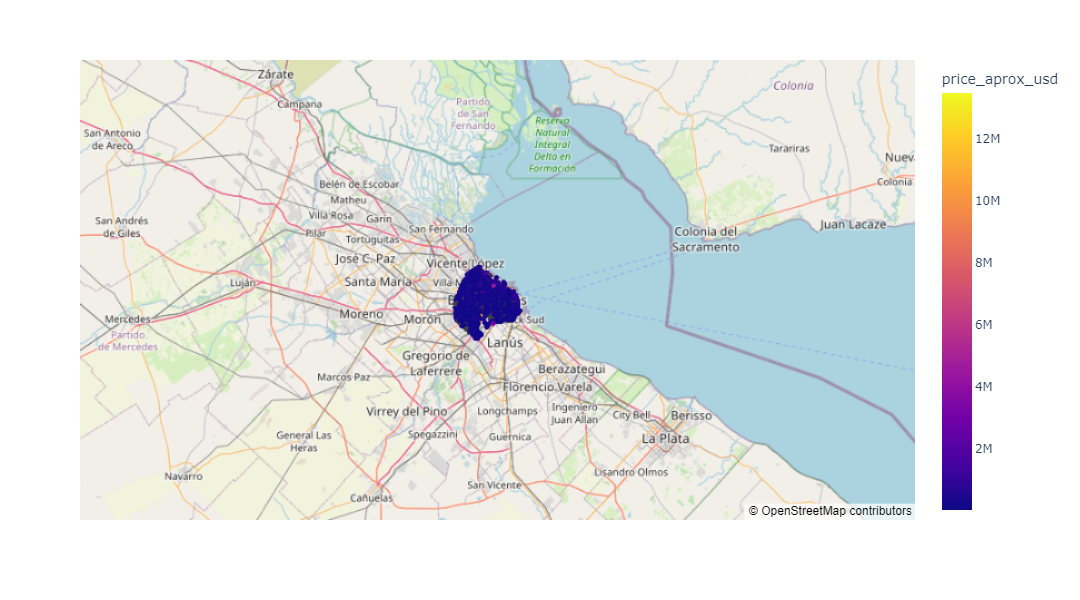

In [275]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": -34.586069	, "lon": -58.414431},  # Map will be centered on buenos-aires
    width=900,  # Width of map
    height=600,  # Height of map
    color="price_aprox_usd",
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()
#plt.hist(df["price_usd_per_m2"], bins=10, rwidth=0.9, color="g")
#plt.boxplot(df["surface_covered_in_m2"], vert=False)

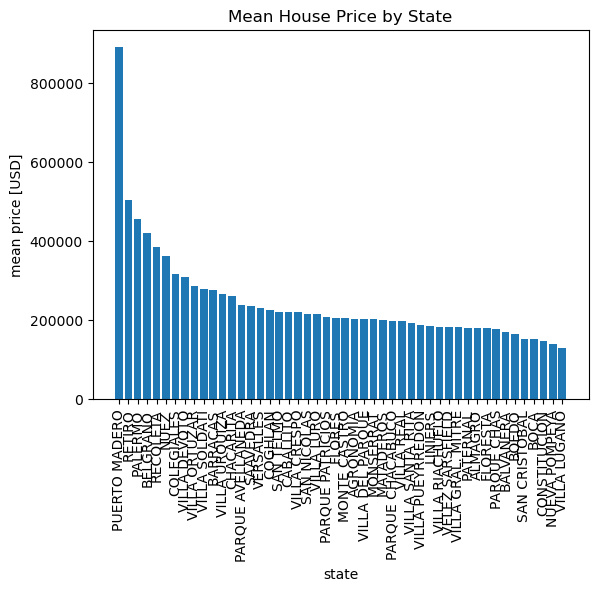

In [276]:
#plot a barchart to see distribution and outliers
price = df.groupby("barrio")["price_aprox_usd"].mean().sort_values(ascending=False)
plt.bar(x=price.index, height=price.values)
plt.xlabel("state")
plt.ylabel("mean price [USD]")
plt.title("Mean House Price by State")
plt.xticks(rotation=90);

lets focus on districto federal for now

In [278]:
mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
mask_apt = df["property_type"] == "apartment"
mask_price = df["price_aprox_usd"] < 400_000
df = df[mask_ba & mask_apt & mask_price]

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11615 entries, 18 to 18978
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_on               11615 non-null  object 
 1   property_type            11615 non-null  object 
 2   place_with_parent_names  11615 non-null  object 
 3   lat                      11615 non-null  float64
 4   lon                      11615 non-null  float64
 5   price_aprox_usd          11615 non-null  float64
 6   surface_total_in_m2      10852 non-null  float64
 7   surface_covered_in_m2    10923 non-null  float64
 8   price_usd_per_m2         10847 non-null  float64
 9   barrio                   11615 non-null  object 
dtypes: float64(6), object(4)
memory usage: 998.2+ KB


In [ ]:
df.drop(columns = ["created_on","place_with_parent_names","property_type"], inplace=True)

we then check for collinearity

In [ ]:
corr = df.select_dtypes("number").drop(columns="price_aprox_usd").corr()
sns.heatmap(corr)

In [ ]:
#drop columns with collinearity
df.drop(columns = ["surface_total_in_m2", "price_usd_per_m2"], inplace = True)
df.head()

# creating the model

In [281]:
#split the data 
features = ["lat", "lon", "surface_covered_in_m2", "barrio"]
target = ["price_aprox_usd"]
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .75)

#find the baseline
y_mean = y_train.mean()
y_pred = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred)

print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: price_aprox_usd    170137.92957
dtype: float64
Baseline MAE: 67442.87956328155


In [283]:
X_test.head()

,lat,lon,surface_covered_in_m2,barrio
592,-34.566304,-58.435399,35.0,PALERMO
9340,-34.627022,-58.396951,36.0,SAN CRISTOBAL
16178,-34.554242,-58.491549,36.0,SAAVEDRA
5724,-34.613743,-58.379076,72.0,MONSERRAT
14575,-34.626124,-58.385952,95.0,CONSTITUCION


In [285]:
#create the model
model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [289]:
#test the model
pred = model.predict(X_train)
pred_mae = mean_absolute_error(y_train, pred)
print("pred_mae:", pred_mae)

pred_mae: 13946.864143330304


In [ ]:
test_pred = model.predict(X_test)
#test_mae = mean_absolute_error(y_test, test_pred)
#print("Test_Mae:", test_mae)

In [213]:
def make_prediction(lat, lon, area, barrio):
    data = {
        "lat":lat,
        "lon":lon,
        "surface_covered_in_m2":area,
        "barrio":barrio
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [209]:
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["surface_covered_in_m2"].min(),
        max=X_train["surface_covered_in_m2"].max(),
        value=X_train["surface_covered_in_m2"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    barrio=Dropdown(options=sorted(X_train["barrio"].unique())),
);

interactive(children=(FloatSlider(value=-34.59990000376248, description='lat', max=-34.5357369, min=-34.694841…